ξ_0 = 0.00, Real DFT: 0.0001, Real FFT: 0.0001
ξ_1 = 0.31, Real DFT: 0.0001, Real FFT: 0.0001
ξ_2 = 0.61, Real DFT: 0.0001, Real FFT: 0.0001
ξ_3 = 0.92, Real DFT: 0.0001, Real FFT: 0.0001
ξ_4 = 1.23, Real DFT: 0.0001, Real FFT: 0.0001
ξ_5 = 1.53, Real DFT: 0.0001, Real FFT: 0.0001
FFT execution time: 0.0006 seconds
DFT execution time: 0.0710 seconds


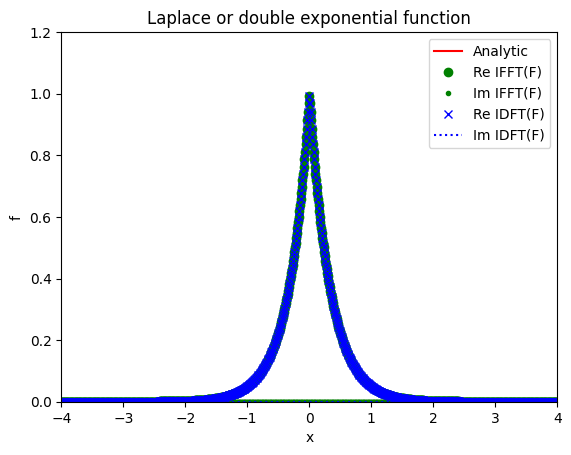

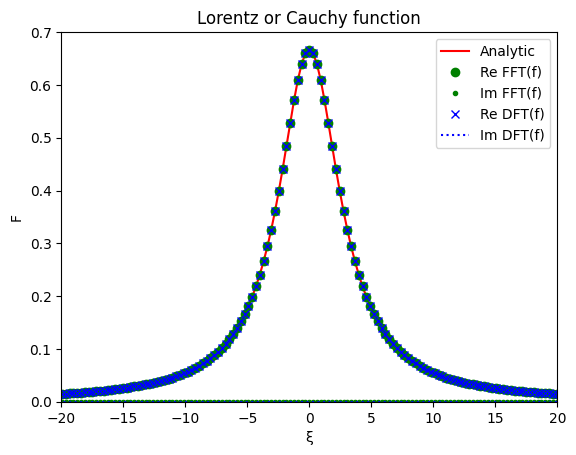

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Set up the parameters and grids
N = 2048  # Grid size
Dx = 0.01  # Grid step in real space
Lx = N * Dx  # Upper truncation limit in real space
Dxi = 2 * np.pi / Lx  # Grid step in Fourier space (Nyquist relation)
x = Dx * np.arange(-N/2, N/2)  # Grid in real space
xi = Dxi * np.arange(-N/2, N/2)  # Grid in Fourier space

# Analytical expressions for Laplace and Lorentzian functions
lambda_ = 3  # Parameter for the functions
fa = np.exp(-lambda_ * np.abs(x))  # Laplace (bilateral exponential) function
Fa = 2 * lambda_ / (xi**2 + lambda_**2)  # Lorentzian (Cauchy) function

# FFT implementation
start_time_fft = time.time()
Fn = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fa))) * Lx
time_fft = time.time() - start_time_fft

# DFT implementation
start_time_dft = time.time()
Fn2 = np.zeros_like(xi, dtype=np.complex_)
for j in range(N):
    Fn2[j] = np.sum(np.exp(1j * xi[j] * x) * fa) * Dx
time_dft = time.time() - start_time_dft

# Output real parts of DFT and FFT for specific points
for j in range(6):
    print(f"ξ_{j} = {j * Dxi:.2f}, Real DFT: {np.real(Fn2[j]):.4f}, Real FFT: {np.real(Fn[j]):.4f}")

# Print the execution times
print(f"FFT execution time: {time_fft:.4f} seconds")
print(f"DFT execution time: {time_dft:.4f} seconds")

# # Plotting the functions and their Fourier transforms
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(x, fa, 'r', label='Analytic Laplace')
# plt.title('Laplace Function')
# plt.xlabel('x')
# plt.ylabel('f(x)')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(xi, Fa, 'r', label='Analytic Lorentzian')
# plt.plot(xi, np.real(Fn), 'g', label='Real FFT')
# plt.plot(xi, np.real(Fn2), 'b', label='Real DFT')
# plt.title('Lorentzian Function')
# plt.xlabel('ξ')
# plt.ylabel('F(ξ)')
# plt.legend()

# plt.tight_layout()
# plt.show()

# Plotting the functions and their Fourier transforms
plt.figure(1)
plt.plot(x, fa, 'r', label='Analytic')
plt.plot(x, np.real(fn), 'og', label='Re IFFT(F)')
plt.plot(x, np.imag(fn), '.g', label='Im IFFT(F)')
plt.plot(x, np.real(fn2), 'xb', label='Re IDFT(F)')
plt.plot(x, np.imag(fn2), ':b', label='Im IDFT(F)')
plt.axis([-4, 4, 0, 1.2])
plt.xlabel('x')
plt.ylabel('f')
plt.legend()
plt.title('Laplace or double exponential function')

plt.figure(2)
plt.plot(xi, Fa, 'r', label='Analytic')
plt.plot(xi, np.real(Fn), 'og', label='Re FFT(f)')
plt.plot(xi, np.imag(Fn), '.g', label='Im FFT(f)')
plt.plot(xi, np.real(Fn2), 'xb', label='Re DFT(f)')
plt.plot(xi, np.imag(Fn2), ':b', label='Im DFT(f)')
plt.axis([-20, 20, 0, 0.7])
plt.xlabel('ξ')
plt.ylabel('F')
plt.legend()
plt.title('Lorentz or Cauchy function')

plt.show()
